In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [2]:
df=pd.read_csv(r"C:\Users\rajen\Downloads\archive (4)\tweet_emotions.csv")

In [3]:
df

,tweet_id,sentiment,content
0,1.956967e+09,empty,NaN
1,1.956968e+09,sadness,NaN
2,1.956968e+09,sadness,NaN
3,1.956968e+09,enthusiasm,NaN
4,1.956968e+09,neutral,NaN
...,...,...,...
39995,1.753919e+09,neutral,NaN
39996,1.753919e+09,love,NaN
39997,1.753919e+09,love,NaN
39998,1.753919e+09,happiness,NaN


In [4]:
df.shape

(40000, 3)

In [5]:
df.info

<bound method DataFrame.info of            tweet_id   sentiment content
0      1.956967e+09       empty     NaN
1      1.956968e+09     sadness     NaN
2      1.956968e+09     sadness     NaN
3      1.956968e+09  enthusiasm     NaN
4      1.956968e+09     neutral     NaN
...             ...         ...     ...
39995  1.753919e+09     neutral     NaN
39996  1.753919e+09        love     NaN
39997  1.753919e+09        love     NaN
39998  1.753919e+09   happiness     NaN
39999  1.753919e+09        love     NaN

[40000 rows x 3 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   39262 non-null  float64
 1   sentiment  37064 non-null  object 
 2   content    21528 non-null  object 
dtypes: float64(1), object(2)
memory usage: 937.6+ KB


In [7]:
df.dtypes

tweet_id     float64
sentiment     object
content       object
dtype: object

In [8]:
df.isnull().sum()

tweet_id       738
sentiment     2936
content      18472
dtype: int64

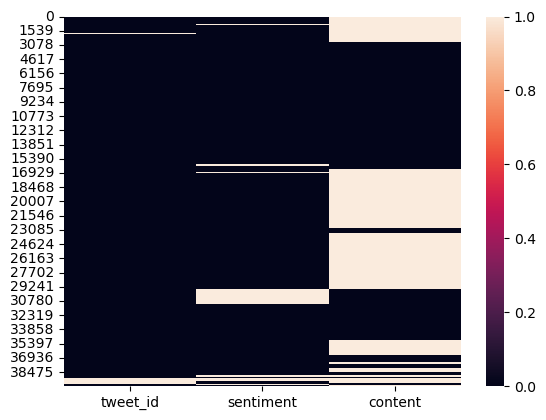

In [9]:
sns.heatmap(data=df.isnull())
plt.show()


In [10]:
df.isna().sum()

tweet_id       738
sentiment     2936
content      18472
dtype: int64

In [11]:
df.dropna(inplace=True)


In [12]:
df.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [13]:
df.shape

(19445, 3)

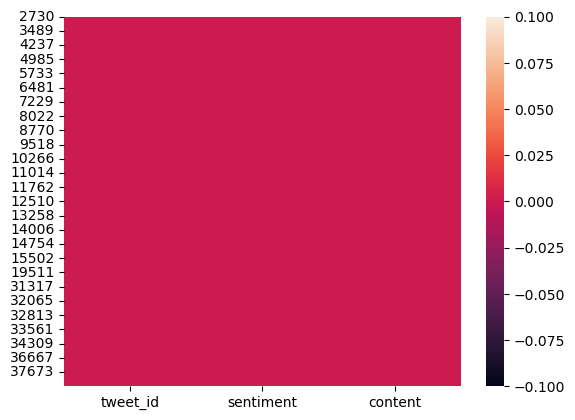

In [14]:
sns.heatmap(data=df.isna())
plt.show()

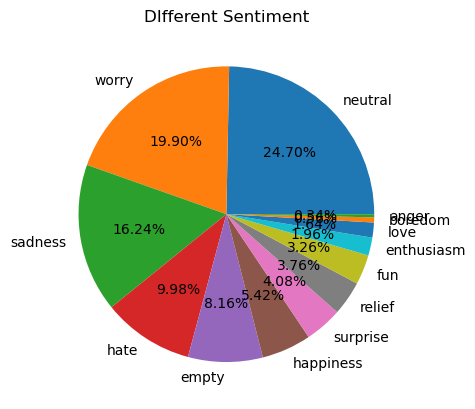

In [15]:
plt.pie(df['sentiment'].value_counts(),labels=df['sentiment'].unique(),autopct='%.2f%%')
plt.title("DIfferent Sentiment")
plt.show()


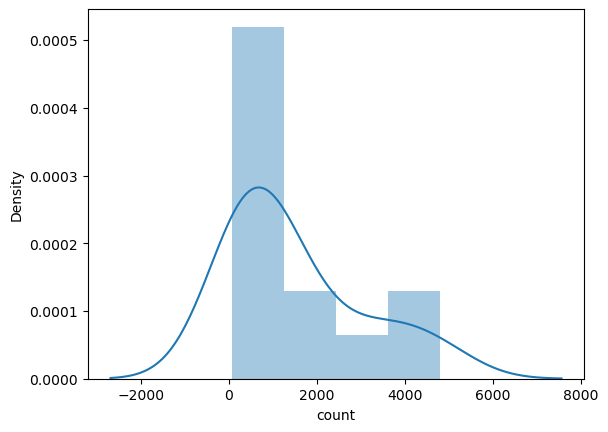

In [16]:
sns.distplot(df['sentiment'].value_counts())
plt.show()

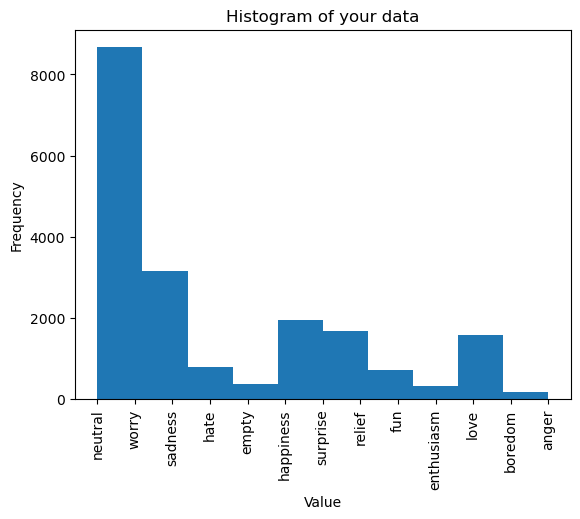

In [17]:
plt.hist(df['sentiment'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of your data')
plt.xticks(rotation=90)
plt.show()


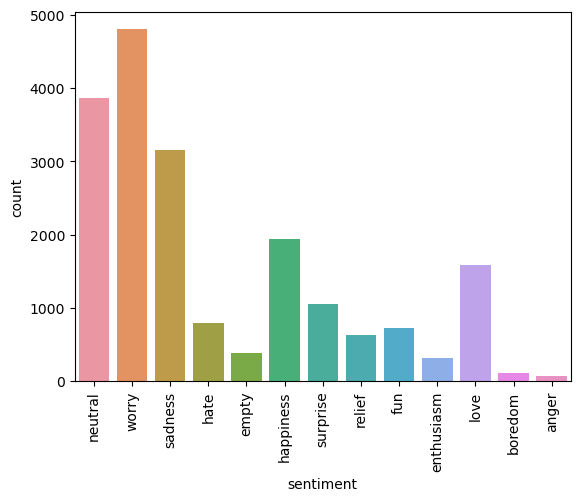

In [18]:
sns.countplot(data=df, x='sentiment')
plt.xticks(rotation=90)
plt.show()



In [19]:
df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [20]:
count1 = Counter(" ".join(df[df['sentiment']=='empty']['content']).split()).most_common(15)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0:"words in empty", 1:"count"})





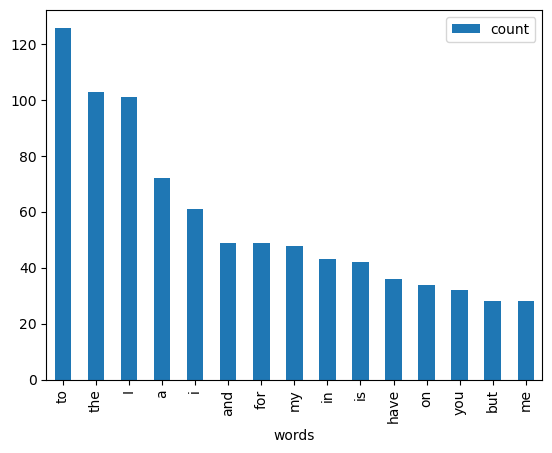

In [21]:
df1.plot.bar()
y_p = np.arange(len(df1["words in empty"]))
plt.xticks(y_p, df1["words in empty"])
plt.xlabel('words')
plt.show()

In [22]:
count2 = Counter(" ".join(df[df['sentiment']=='sadness']['content']).split()).most_common(15)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in sadness", 1:"count"})

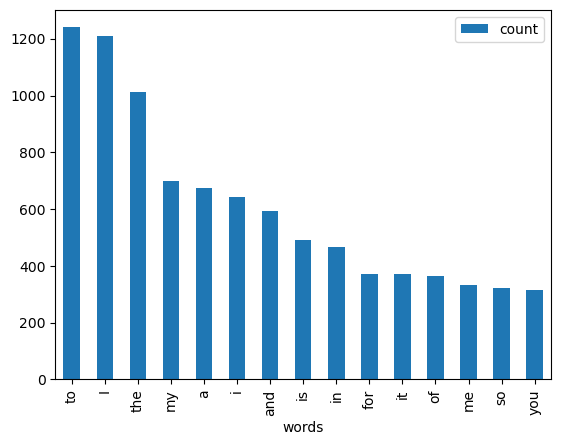

In [23]:
df2.plot.bar()
y_p = np.arange(len(df2["words in sadness"]))
plt.xticks(y_p, df2["words in sadness"])
plt.xlabel('words')
plt.show()

In [24]:
 df['sentiment'].unique()

array(['neutral', 'worry', 'sadness', 'hate', 'empty', 'happiness',
       'surprise', 'relief', 'fun', 'enthusiasm', 'love', 'boredom',
       'anger'], dtype=object)

In [25]:
count3 = Counter(" ".join(df[df['sentiment']=='enthusiasm']['content']).split()).most_common(15)
df3 = pd.DataFrame.from_dict(count3)
df3 = df3.rename(columns={0:"words in enthusiasm", 1:"count"})

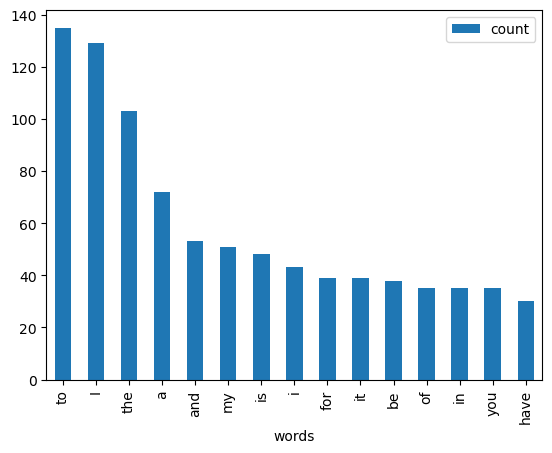

In [26]:
df3.plot.bar()
y_p = np.arange(len(df3["words in enthusiasm"]))
plt.xticks(y_p,df3["words in enthusiasm"])
plt.xlabel("words")
plt.show()

In [27]:
count4 = Counter(" ".join(df[df['sentiment']=='neutral']['content']).split()).most_common(15)
df4 = pd.DataFrame.from_dict(count4)
df4 = df4.rename(columns={0:"words in neutral", 1:"count"})

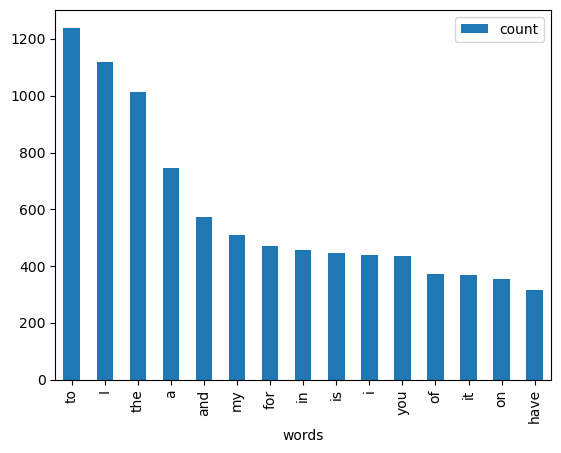

In [28]:
df4.plot.bar()
y_p = np.arange(len(df4["words in neutral"]))
plt.xticks(y_p,df4["words in neutral"])
plt.xlabel("words")
plt.show()

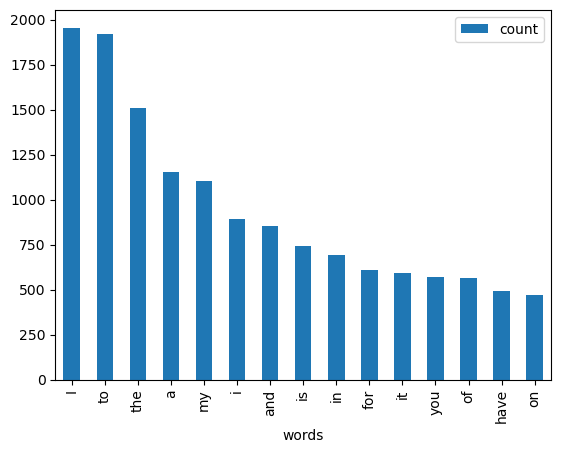

In [29]:
count5 = Counter(" ".join(df[df['sentiment']=='worry']['content']).split()).most_common(15)
df5 = pd.DataFrame.from_dict(count5)
df5 = df5.rename(columns={0:"words in worry", 1:"count"})

df5.plot.bar()
y_p = np.arange(len(df5["words in worry"]))
plt.xticks(y_p,df5["words in worry"])
plt.xlabel("words")
plt.show()

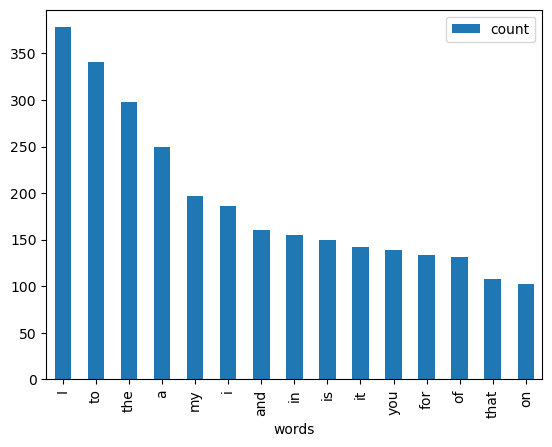

In [30]:
count6 = Counter(" ".join(df[df['sentiment']=='surprise']['content']).split()).most_common(15)
df6 = pd.DataFrame.from_dict(count6)
df6 = df6.rename(columns={0:"words in surprise", 1:"count"})

df6.plot.bar()
y_p = np.arange(len(df6["words in surprise"]))
plt.xticks(y_p,df6["words in surprise"])
plt.xlabel("words")
plt.show()

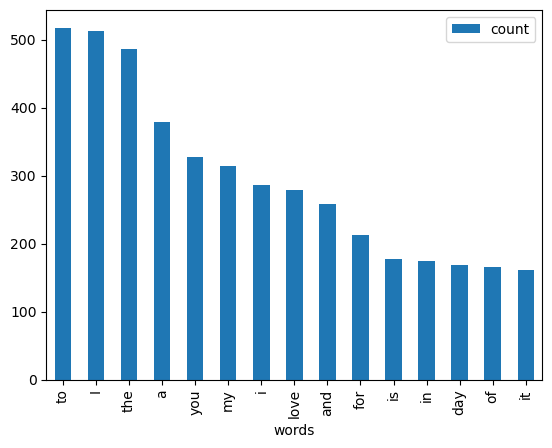

In [31]:
count7 = Counter(" ".join(df[df['sentiment']=='love']['content']).split()).most_common(15)
df7 = pd.DataFrame.from_dict(count7)
df7 = df7.rename(columns={0:"words in love", 1:"count"})

df7.plot.bar()
y_p = np.arange(len(df7["words in love"]))
plt.xticks(y_p,df7["words in love"])
plt.xlabel("words")
plt.show()

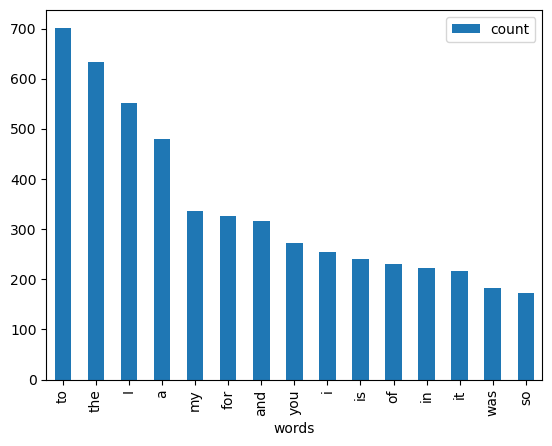

In [32]:
count8 = Counter(" ".join(df[df['sentiment']=='happiness']['content']).split()).most_common(15)
df8 = pd.DataFrame.from_dict(count8)
df8 = df8.rename(columns={0:"words in happiness", 1:"count"})

df8.plot.bar()
y_p = np.arange(len(df8["words in happiness"]))
plt.xticks(y_p,df8["words in happiness"])
plt.xlabel("words")
plt.show()

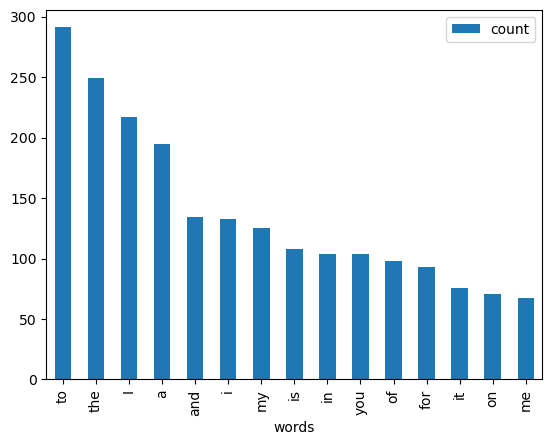

In [33]:
count9 = Counter(" ".join(df[df['sentiment']=='fun']['content']).split()).most_common(15)
df9 = pd.DataFrame.from_dict(count9)
df9 = df9.rename(columns={0:"words in fun", 1:"count"})

df9.plot.bar()
y_p = np.arange(len(df9["words in fun"]))
plt.xticks(y_p,df9["words in fun"])
plt.xlabel("words")
plt.show()

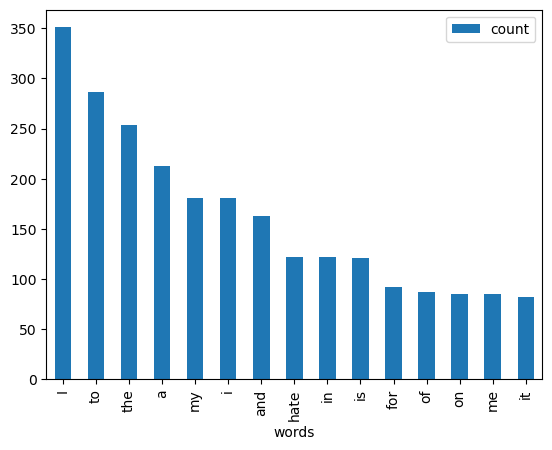

In [34]:
count10 = Counter(" ".join(df[df['sentiment']=='hate']['content']).split()).most_common(15)
df10 = pd.DataFrame.from_dict(count10)
df10 = df10.rename(columns={0:"words in hate", 1:"count"})

df10.plot.bar()
y_p = np.arange(len(df10["words in hate"]))
plt.xticks(y_p,df10["words in hate"])
plt.xlabel("words")
plt.show()

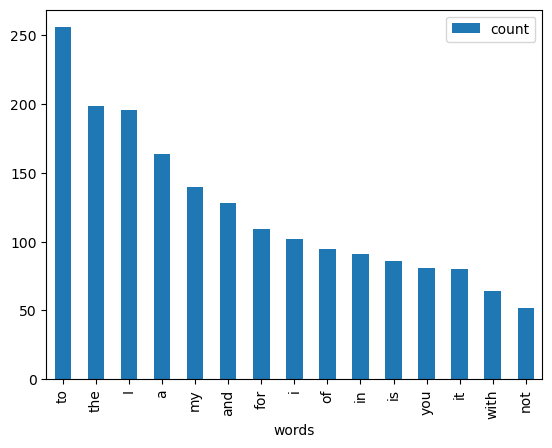

In [35]:
count11 = Counter(" ".join(df[df['sentiment']=='relief']['content']).split()).most_common(15)
df11 = pd.DataFrame.from_dict(count11)
df11 = df11.rename(columns={0:"words in relief", 1:"count"})

df11.plot.bar()
y_p = np.arange(len(df11["words in relief"]))
plt.xticks(y_p,df11["words in relief"])
plt.xlabel("words")
plt.show()

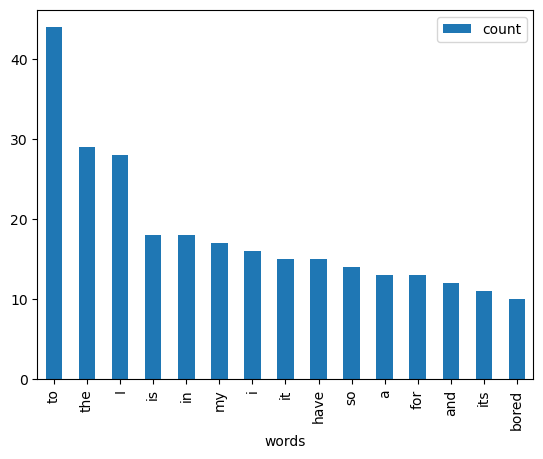

In [36]:
count12 = Counter(" ".join(df[df['sentiment']=='boredom']['content']).split()).most_common(15)
df12 = pd.DataFrame.from_dict(count12)
df12 = df12.rename(columns={0:"words in boredom", 1:"count"})

df12.plot.bar()
y_p = np.arange(len(df12["words in boredom"]))
plt.xticks(y_p,df12["words in boredom"])
plt.xlabel("words")
plt.show()

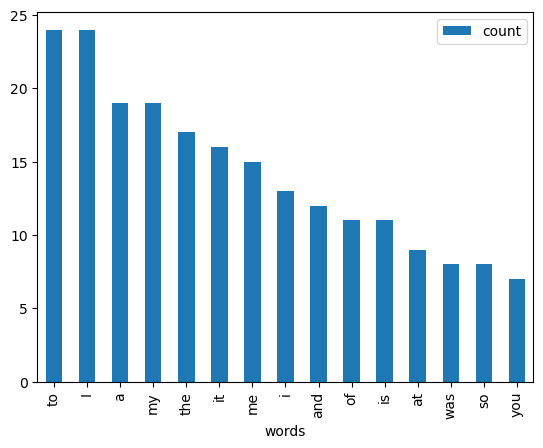

In [37]:
count13 = Counter(" ".join(df[df['sentiment']=='anger']['content']).split()).most_common(15)
df13 = pd.DataFrame.from_dict(count13)
df13 = df13.rename(columns={0:"words in anger", 1:"count"})

df13.plot.bar()
y_p = np.arange(len(df13["words in anger"]))
plt.xticks(y_p,df13["words in anger"])
plt.xlabel("words")
plt.show()

In [38]:
df

,tweet_id,sentiment,content
2730,1.957615e+09,neutral,@mikebthatsme ugggh idk how to do that but i ...
2731,1.957615e+09,neutral,@riineySTACKEDx lol cnt its too slow
2732,1.957616e+09,worry,@_refugee_ /me gets &quot;Your video will star...
2733,1.957616e+09,sadness,"i'm so sad, because my beloved boy doesn't onl..."
2734,1.957616e+09,sadness,@DaveDeRoo hardly :/ some of my furniture is b...
...,...,...,...
39896,1.753902e+09,worry,ï¿½Chillingoutnow Just testing how to work Twi...
39897,1.753902e+09,fun,"From Hyderabad Blues 2, on mimicking the Ameri..."
39898,1.753903e+09,love,happy mothers day!
39899,1.753903e+09,neutral,is going to go get some food.


In [39]:
# feature engineering
f = feature_extraction.text.CountVectorizer(stop_words='english')
x = f.fit_transform(df['content'])
np.shape(x)

(19445, 27734)

In [40]:
df['content'].unique()

array(['@mikebthatsme ugggh idk how to do that  but i only wanna stop getting texts from twitterr  -ilsE*',
       '@riineySTACKEDx lol cnt its too slow',
       '@_refugee_ /me gets &quot;Your video will start in 15 seconds&quot;, Exiting to watch ... for minutes  #flash #linux #fail',
       ..., 'happy mothers day!', 'is going to go get some food.',
       '@HIstapleface answer my really cool questions'], dtype=object)

In [41]:
df['sentiment']=df['sentiment'].map({'empty':0,'sadness':1,'enthusiasm':2,'neutral':3,'worry':4,'surprise':5,'love':6,'happiness':7,'fun':8,'hate':9,'relief':10,'boredom':11,'anger':12})

In [42]:
 df['sentiment'].unique()

array([ 3,  4,  1,  9,  0,  7,  5, 10,  8,  2,  6, 11, 12], dtype=int64)

In [43]:
y=df.sentiment

In [44]:
x.shape

(19445, 27734)

In [45]:
y

2730     3
2731     3
2732     4
2733     1
2734     1
        ..
39896    4
39897    8
39898    6
39899    3
39900    2
Name: sentiment, Length: 19445, dtype: int64

In [46]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.20,random_state=42)

In [47]:
print(np.shape(X_train), np.shape(X_test))

(15556, 27734) (3889, 27734)


# SVM

In [48]:
svcm=SVC()

In [49]:
svcm.fit(X_train,y_train)

SVC()

In [50]:
y_pred = svcm.predict(X_test)

In [51]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.41      0.18      0.25       634
           2       0.00      0.00      0.00        73
           3       0.33      0.52      0.41       804
           4       0.31      0.62      0.41       930
           5       0.00      0.00      0.00       207
           6       0.53      0.30      0.38       317
           7       0.29      0.20      0.24       367
           8       0.00      0.00      0.00       166
           9       0.52      0.10      0.17       144
          10       0.00      0.00      0.00       136
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        12

    accuracy                           0.33      3889
   macro avg       0.18      0.15      0.14      3889
weighted avg       0.30      0.33      0.28      3889



In [52]:
acc=accuracy_score(y_test,y_pred)

print("Accuracy:{:.2f}%".format(acc*100))

Accuracy:33.22%


In [53]:

cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[  0   2   0  32  37   0   0   3   0   0   0   0   0]
 [  1 111   0 136 353   0   9  15   1   8   0   0   0]
 [  0   6   0  31  33   0   1   2   0   0   0   0   0]
 [  0  33   0 420 305   0   9  36   0   1   0   0   0]
 [  0  64   0 249 577   1  16  21   0   2   0   0   0]
 [  0   5   0  68 114   0   8  12   0   0   0   0   0]
 [  0  10   0  69 100   0  95  42   0   1   0   0   0]
 [  0  12   0 118 130   0  32  74   0   1   0   0   0]
 [  0   1   0  61  79   1   1  23   0   0   0   0   0]
 [  0  12   0  31  83   0   1   2   0  15   0   0   0]
 [  0   6   0  46  51   0   8  23   1   1   0   0   0]
 [  0   6   0   5  14   0   0   0   0   0   0   0   0]
 [  0   0   0   2  10   0   0   0   0   0   0   0   0]]


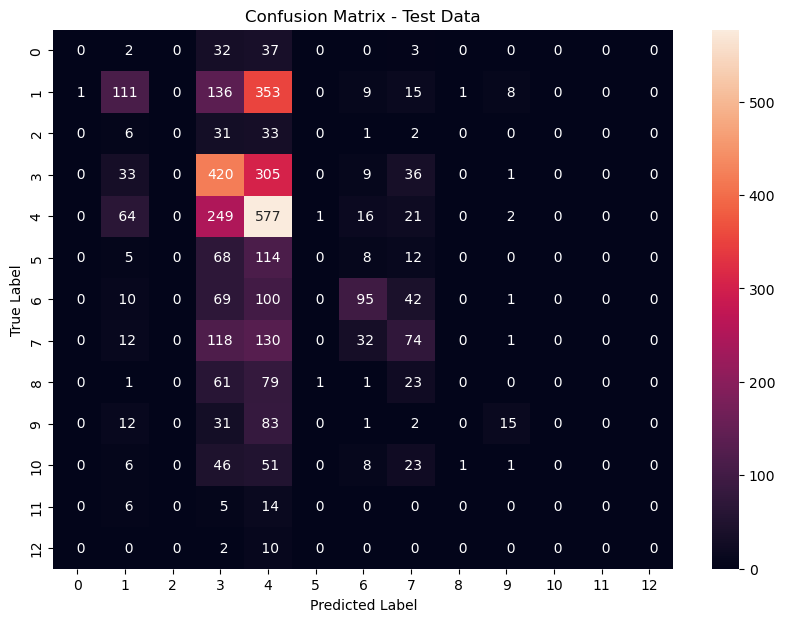

In [54]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [109]:
yb= label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12])
nc= yb.shape[1]
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

In [115]:
y_score=classifier.fit(X_train,y_train).decision_function(X_test)

In [116]:
from sklearn.metrics import roc_curve,auc
fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(nc):
    fpr[i], tpr[i], _ = roc_curve(y_test ==i, y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

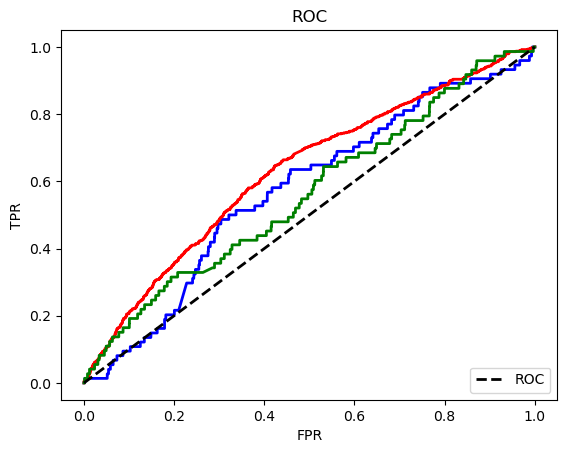

In [118]:
plt.figure()
color = ['blue','red','green']
for i, color in zip(range(nc),color):
    plt.plot (fpr[i], tpr[i], color=color, lw=2)
plt.plot([0,1], [0,1], 'k--', lw=2,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [55]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# tunning for svm

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [58]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}



In [59]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [60]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.316 total time=  32.9s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.334 total time=  32.7s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.335 total time=  33.5s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.334 total time=  32.6s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.327 total time=  32.4s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.250 total time=  47.5s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.253 total time=  48.7s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.251 total time=  47.2s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.251 total time=  49.5s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.250 total time=  50.1s
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.275 total time=  31.4s
[CV 2/5] END .............C=0.1, kernel=sigmoid;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             verbose=3)

In [61]:
best_parameter = grid.best_params_
best_model = grid.best_estimator_
print('hyperparameters: ',best_parameter)

hyperparameters:  {'C': 0.1, 'kernel': 'linear'}


In [62]:
y_pred = best_model.predict(X_test)

In [63]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",(acc*100))

Accuracy: 33.479043455901255


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.38      0.18      0.24       634
           2       0.00      0.00      0.00        73
           3       0.31      0.60      0.41       804
           4       0.34      0.53      0.41       930
           5       0.00      0.00      0.00       207
           6       0.51      0.35      0.42       317
           7       0.25      0.21      0.23       367
           8       0.00      0.00      0.00       166
           9       0.53      0.18      0.27       144
          10       0.00      0.00      0.00       136
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        12

    accuracy                           0.33      3889
   macro avg       0.18      0.16      0.15      3889
weighted avg       0.29      0.33      0.29      3889



In [65]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[  0   4   0  34  33   0   0   3   0   0   0   0   0]
 [  1 113   0 188 285   1  15  20   0  11   0   0   0]
 [  0   7   0  35  26   0   1   2   1   1   0   0   0]
 [  0  33   0 486 232   0  12  40   0   1   0   0   0]
 [  0  70   0 305 489   1  18  40   1   6   0   0   0]
 [  0  10   0  79  87   0   9  22   0   0   0   0   0]
 [  0   8   0  89  58   0 111  49   0   2   0   0   0]
 [  0  18   0 156  76   1  38  77   0   1   0   0   0]
 [  0   6   0  77  50   0   2  31   0   0   0   0   0]
 [  0  13   0  43  59   0   1   2   0  26   0   0   0]
 [  0   9   0  54  40   0   9  23   0   1   0   0   0]
 [  0   6   0   7  11   0   1   0   0   0   0   0   0]
 [  0   0   0   5   7   0   0   0   0   0   0   0   0]]


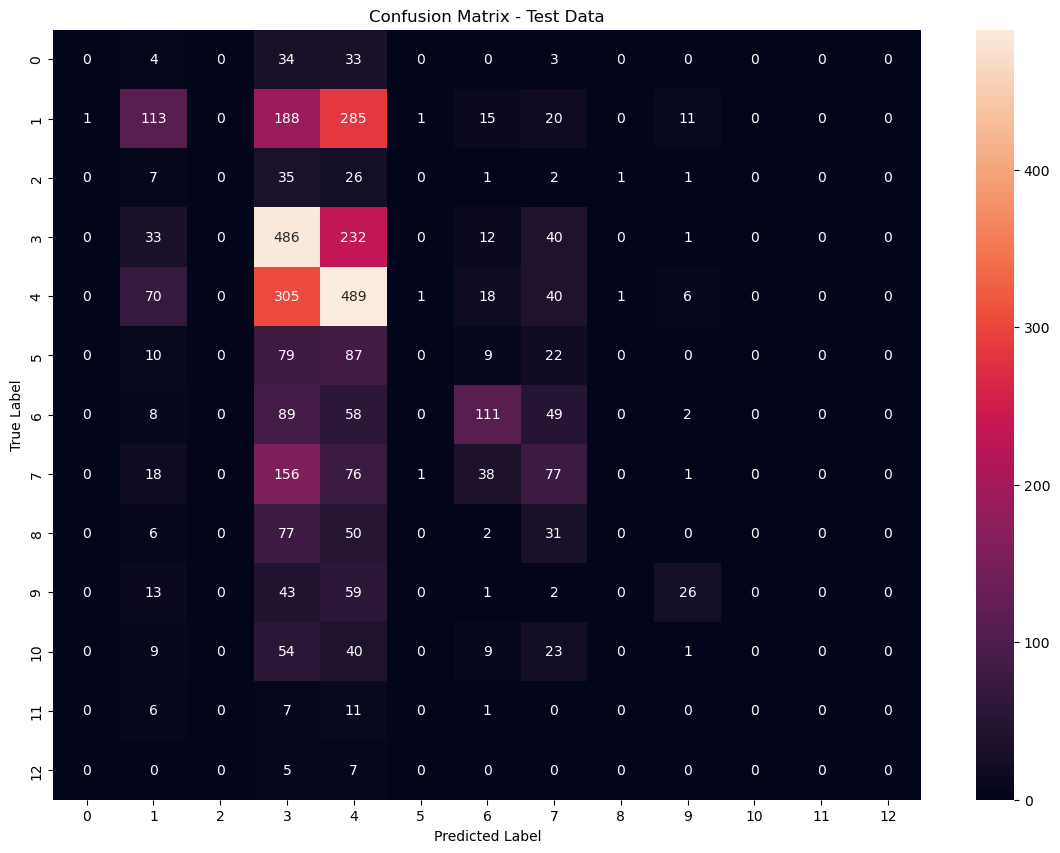

In [66]:
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# randomizedSearchCV

In [67]:
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf','poly','sigmoid'],  # Kernel type
      
}


In [68]:
random = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [69]:
random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...............C=1, kernel=sigmoid;, score=0.318 total time=  21.4s
[CV 2/5] END ...............C=1, kernel=sigmoid;, score=0.329 total time=  22.2s
[CV 3/5] END ...............C=1, kernel=sigmoid;, score=0.332 total time=  21.6s
[CV 4/5] END ...............C=1, kernel=sigmoid;, score=0.330 total time=  24.9s
[CV 5/5] END ...............C=1, kernel=sigmoid;, score=0.328 total time=  23.5s
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.317 total time=  37.8s
[CV 2/5] END ...................C=1, kernel=rbf;, score=0.329 total time=  36.5s
[CV 3/5] END ...................C=1, kernel=rbf;, score=0.329 total time=  32.9s
[CV 4/5] END ...................C=1, kernel=rbf;, score=0.331 total time=  31.4s
[CV 5/5] END ...................C=1, kernel=rbf;, score=0.325 total time=  31.1s
[CV 1/5] END .................C=10, kernel=poly;, score=0.273 total time=  34.9s
[CV 2/5] END .................C=10, kernel=poly;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   verbose=3)

In [70]:
best_parameters = random.best_params_
best_model = random.best_estimator_
print('Hyperparameters:',best_parameters)

Hyperparameters: {'kernel': 'linear', 'C': 0.1}


In [71]:
y_pred = best_model.predict(X_test)

In [72]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",(acc*100))

Accuracy: 33.479043455901255


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.38      0.18      0.24       634
           2       0.00      0.00      0.00        73
           3       0.31      0.60      0.41       804
           4       0.34      0.53      0.41       930
           5       0.00      0.00      0.00       207
           6       0.51      0.35      0.42       317
           7       0.25      0.21      0.23       367
           8       0.00      0.00      0.00       166
           9       0.53      0.18      0.27       144
          10       0.00      0.00      0.00       136
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        12

    accuracy                           0.33      3889
   macro avg       0.18      0.16      0.15      3889
weighted avg       0.29      0.33      0.29      3889



In [74]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[  0   4   0  34  33   0   0   3   0   0   0   0   0]
 [  1 113   0 188 285   1  15  20   0  11   0   0   0]
 [  0   7   0  35  26   0   1   2   1   1   0   0   0]
 [  0  33   0 486 232   0  12  40   0   1   0   0   0]
 [  0  70   0 305 489   1  18  40   1   6   0   0   0]
 [  0  10   0  79  87   0   9  22   0   0   0   0   0]
 [  0   8   0  89  58   0 111  49   0   2   0   0   0]
 [  0  18   0 156  76   1  38  77   0   1   0   0   0]
 [  0   6   0  77  50   0   2  31   0   0   0   0   0]
 [  0  13   0  43  59   0   1   2   0  26   0   0   0]
 [  0   9   0  54  40   0   9  23   0   1   0   0   0]
 [  0   6   0   7  11   0   1   0   0   0   0   0   0]
 [  0   0   0   5   7   0   0   0   0   0   0   0   0]]


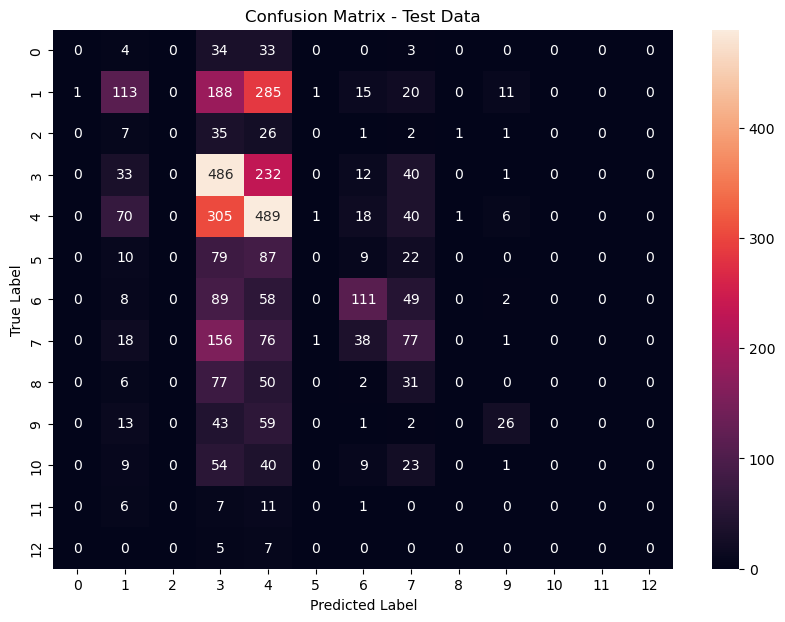

In [75]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# bayes search 

In [76]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [77]:
param_space = {
'C' : Real(1e-6, 1e+6, prior='log-uniform'),
'kernel' : Categorical(['linear', 'rbf', 'poly', 'sigmoid']),
'degree' : Integer(1,5),
'gamma' : Real(1e-6, 1e+1, prior='log-uniform')
}

In [78]:
svcm = SVC()
bayes_search = BayesSearchCV(estimator=svcm, search_spaces=param_space,n_iter=50, cv=5, random_state=10)

In [79]:
bayes_search.fit(X_train,y_train)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
best_param =bayes_search.best_params_

In [ ]:
best_model=bayes_search.best_estimator_

In [ ]:
y_pred=best_model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}%".format(acc * 100))

In [ ]:
print(classification_report(y_test,y_pred))

# Naive Bayes

In [80]:
 from sklearn import model_selection, naive_bayes, metrics,feature_extraction

In [81]:
bayes = naive_bayes.MultinomialNB()

In [82]:
bayes.fit(X_train,y_train)

MultinomialNB()

In [83]:
y_pred_nb=bayes.predict(X_test)

In [84]:
accuracy=metrics.accuracy_score(y_test,y_pred_nb)
accuracy

0.29262021085111856

In [85]:
 print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.28      0.21      0.24       634
           2       0.00      0.00      0.00        73
           3       0.30      0.23      0.26       804
           4       0.28      0.72      0.41       930
           5       0.00      0.00      0.00       207
           6       0.45      0.27      0.34       317
           7       0.29      0.17      0.22       367
           8       0.25      0.01      0.01       166
           9       0.40      0.03      0.05       144
          10       0.00      0.00      0.00       136
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        12

    accuracy                           0.29      3889
   macro avg       0.17      0.13      0.12      3889
weighted avg       0.26      0.29      0.24      3889



In [86]:
cm=confusion_matrix(y_test,y_pred_nb)
cm

array([[  0,   7,   0,  18,  48,   0,   0,   1,   0,   0,   0,   0,   0],
       [  4, 132,   0,  55, 421,   0,   9,  10,   2,   1,   0,   0,   0],
       [  0,   9,   0,  18,  42,   0,   3,   1,   0,   0,   0,   0,   0],
       [  0,  70,   1, 185, 478,   4,  21,  43,   0,   1,   1,   0,   0],
       [  0, 105,   0, 118, 667,   2,  18,  17,   0,   3,   0,   0,   0],
       [  0,  26,   0,  30, 130,   0,   8,  13,   0,   0,   0,   0,   0],
       [  0,  22,   0,  47, 131,   0,  85,  31,   1,   0,   0,   0,   0],
       [  0,  27,   0,  71, 170,   0,  35,  64,   0,   0,   0,   0,   0],
       [  0,  17,   0,  36,  82,   0,   4,  26,   1,   0,   0,   0,   0],
       [  0,  28,   0,  16,  91,   1,   0,   4,   0,   4,   0,   0,   0],
       [  0,  19,   0,  25,  75,   0,   6,  10,   0,   1,   0,   0,   0],
       [  0,   7,   0,   2,  16,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   2,   9,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

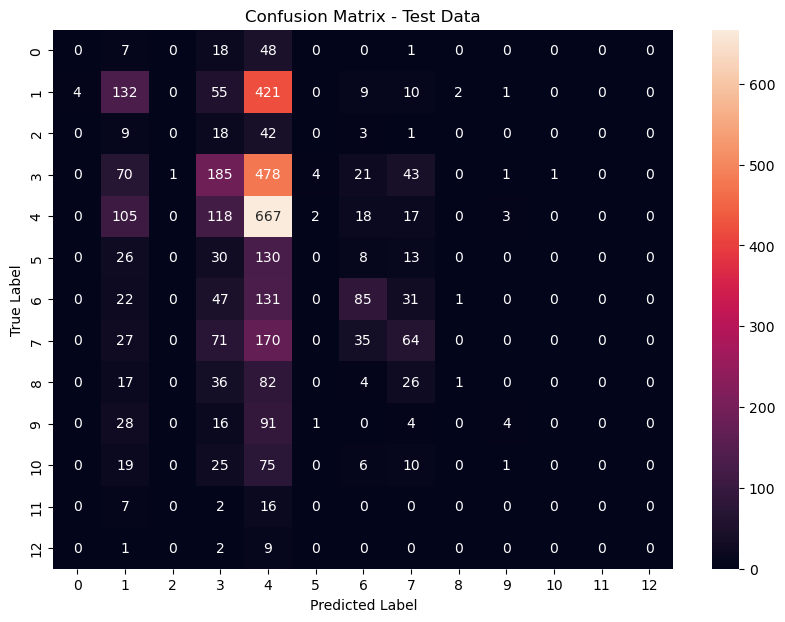

In [87]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Tuning for Vaive Bayes Model

In [88]:
param_grid = {
'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]
}

In [89]:
bayes = naive_bayes.MultinomialNB()
grid_search = GridSearchCV(bayes, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [90]:
best_param = grid_search.best_params_
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(X_train, y_train)
y_pred = best_nb.predict(X_test)

In [91]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 1, 'fit_prior': True}


In [92]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy',(acc*100))

Accuracy 29.262021085111854


In [93]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.28      0.21      0.24       634
           2       0.00      0.00      0.00        73
           3       0.30      0.23      0.26       804
           4       0.28      0.72      0.41       930
           5       0.00      0.00      0.00       207
           6       0.45      0.27      0.34       317
           7       0.29      0.17      0.22       367
           8       0.25      0.01      0.01       166
           9       0.40      0.03      0.05       144
          10       0.00      0.00      0.00       136
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        12

    accuracy                           0.29      3889
   macro avg       0.17      0.13      0.12      3889
weighted avg       0.26      0.29      0.24      3889



In [94]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[  0,   7,   0,  18,  48,   0,   0,   1,   0,   0,   0,   0,   0],
       [  4, 132,   0,  55, 421,   0,   9,  10,   2,   1,   0,   0,   0],
       [  0,   9,   0,  18,  42,   0,   3,   1,   0,   0,   0,   0,   0],
       [  0,  70,   1, 185, 478,   4,  21,  43,   0,   1,   1,   0,   0],
       [  0, 105,   0, 118, 667,   2,  18,  17,   0,   3,   0,   0,   0],
       [  0,  26,   0,  30, 130,   0,   8,  13,   0,   0,   0,   0,   0],
       [  0,  22,   0,  47, 131,   0,  85,  31,   1,   0,   0,   0,   0],
       [  0,  27,   0,  71, 170,   0,  35,  64,   0,   0,   0,   0,   0],
       [  0,  17,   0,  36,  82,   0,   4,  26,   1,   0,   0,   0,   0],
       [  0,  28,   0,  16,  91,   1,   0,   4,   0,   4,   0,   0,   0],
       [  0,  19,   0,  25,  75,   0,   6,  10,   0,   1,   0,   0,   0],
       [  0,   7,   0,   2,  16,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   2,   9,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

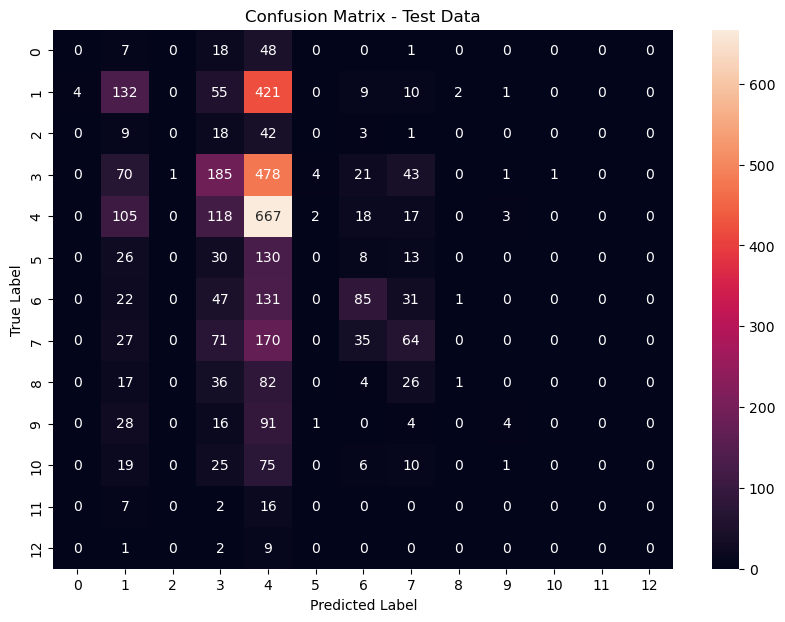

In [95]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()